# OASIS INFOBYTE DATASCIENCE INTERNSHIP

## TASK 3

## Muhammad Ahsan

## CAR PRICE PREDICTION WITH MACHINE LEARNING






## Import libraries


In [52]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# EDA

### Read the Data 

In [4]:
# read the data from csv
df = pd.read_csv("D:\Internships\Oasis\Task_3\car data.csv")

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Innovation\AppData\Local\Temp\ipykernel_18324\337980000.py:2: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("D:\Internships\Oasis\Task_3\car data.csv")


In [5]:
# show the first 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# show the shape of the dataset
df.shape

(301, 9)

In [23]:
# show the unique values of each column of the dataset
print('Unique Values of Car Name',df['Car_Name'].unique())
print('Unique Values of Fuel Type',df['Fuel_Type'].unique())
print('Unique Values of Transmission',df['Transmission'].unique())
print('Unique Values of Selling Type',df['Selling_type'].unique())
print('Unique Values of Owner',df['Owner'].unique())
print('Unique Values of Year',df['Year'].unique())

Unique Values of Car Name ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenge

In [8]:
# show the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# show the description of the data
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# show the data types of the columns
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [11]:
# show the null values in the dataset 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [12]:
# show the duplicated values in the dataset
df.duplicated().sum()

2

In [13]:
# drop the duplicated values in the dataset
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

### Visualisation of Data

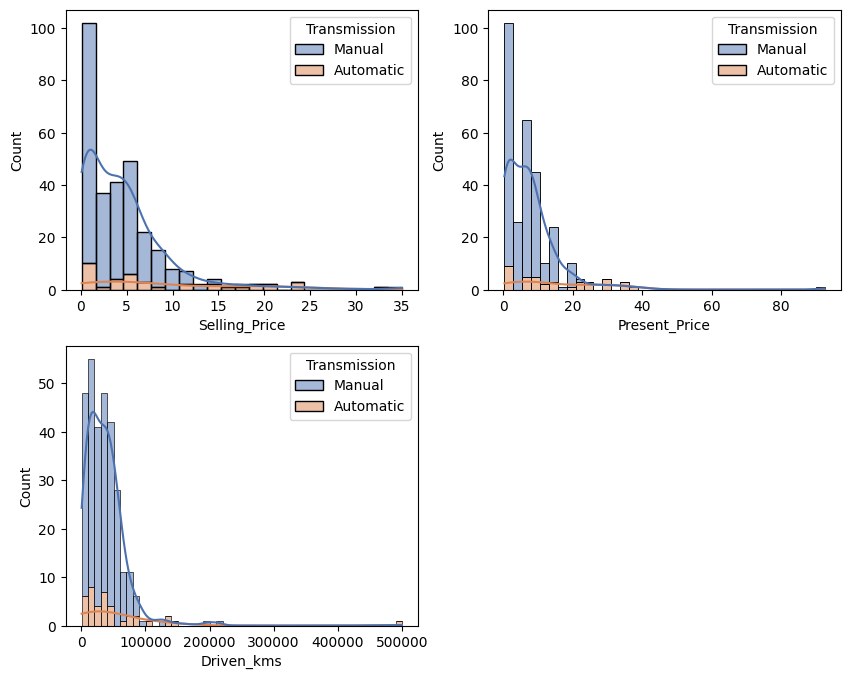

In [14]:
plt.figure(figsize=(10,8))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df, x=col, kde=True, hue='Transmission', multiple='stack', palette='deep', color=col[i])

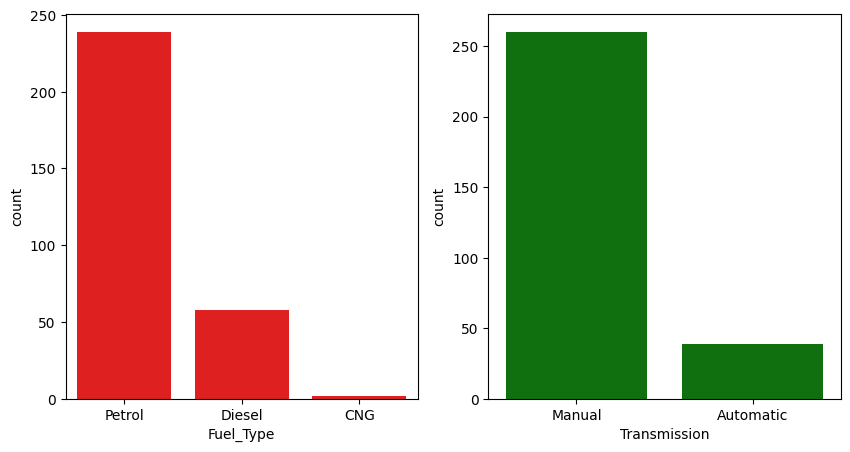

In [15]:
# show the distribution of the Fuel Type and Transmission in the dataset
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Fuel_Type', data = df, color='red')
plt.subplot(1,2,2)
sns.countplot(x = 'Transmission', data = df, color='green')
plt.show()

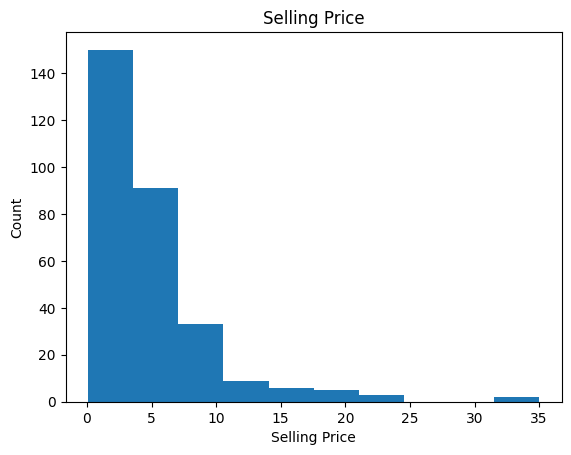

In [16]:
# show the distribution of the Selling Price
plt.hist(df["Selling_Price"])
plt.title("Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()

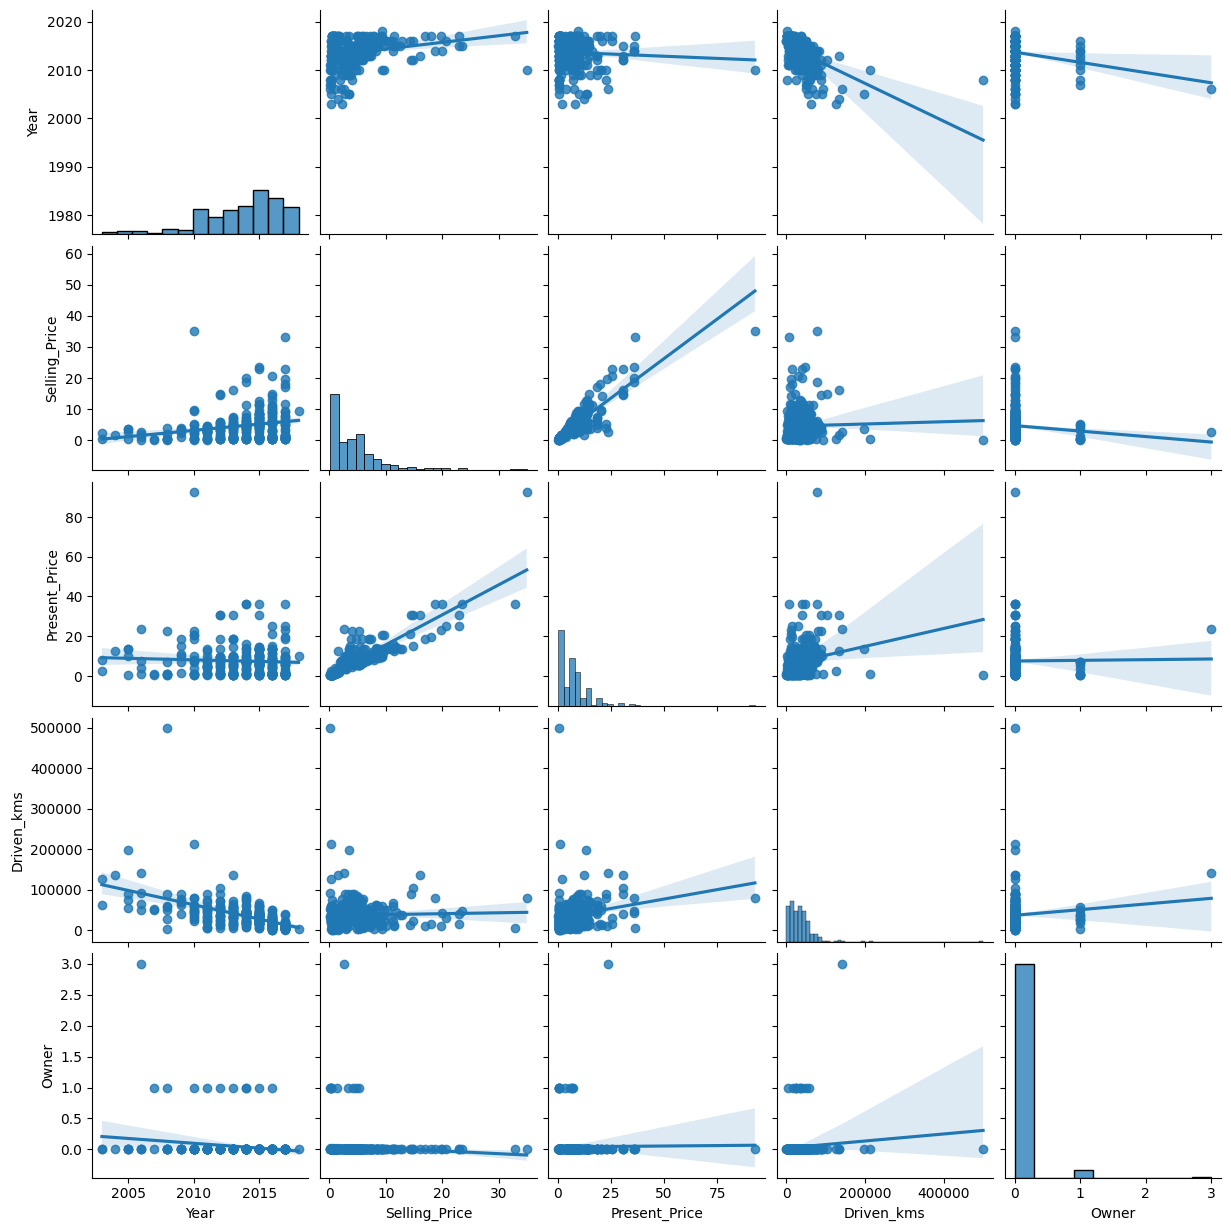

In [17]:
# show the distribution of the Present Price
sns.pairplot(df, kind="reg");

<Axes: xlabel='Driven_kms', ylabel='Selling_Price'>

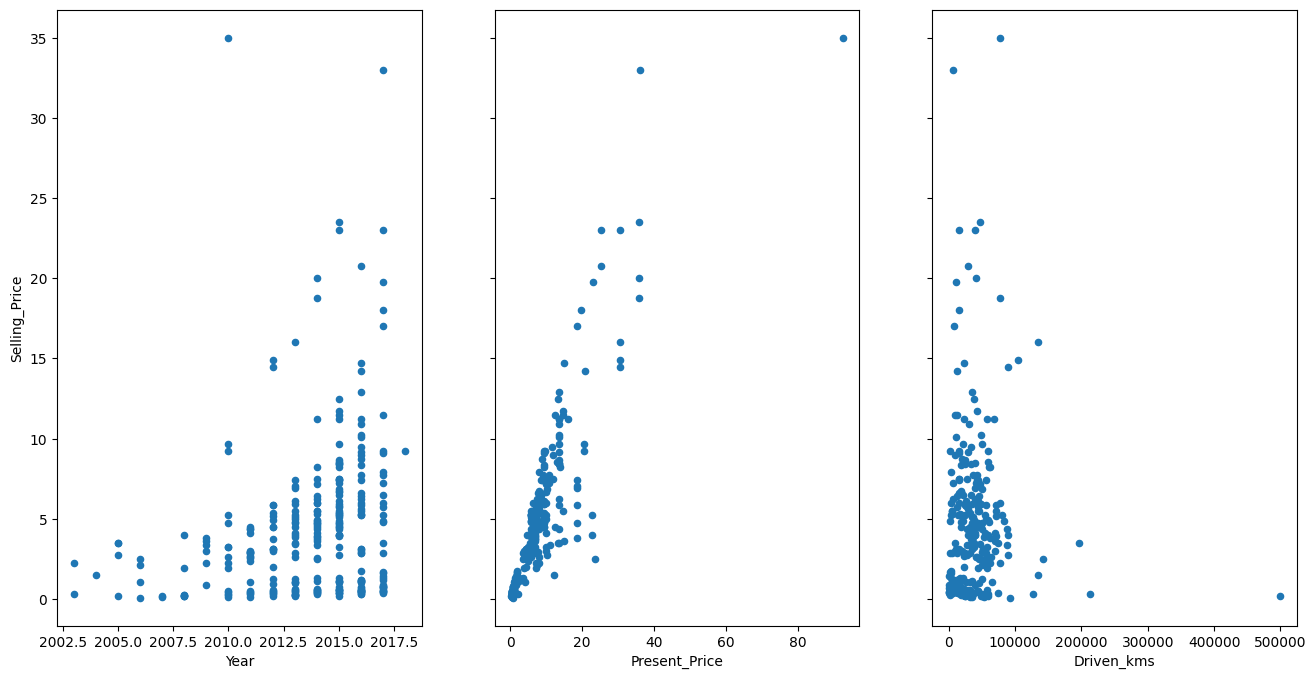

In [18]:
# show the distribution of the Year, Present Price, Driven kms and Selling Price
fig,axs = plt.subplots(1,3, sharey=True)

df.plot(kind='scatter', x='Year', y='Selling_Price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter',x='Present_Price',y='Selling_Price',ax=axs[1],figsize=(16, 8))
df.plot(kind='scatter',x='Driven_kms',y='Selling_Price',ax=axs[2],figsize=(16, 8))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


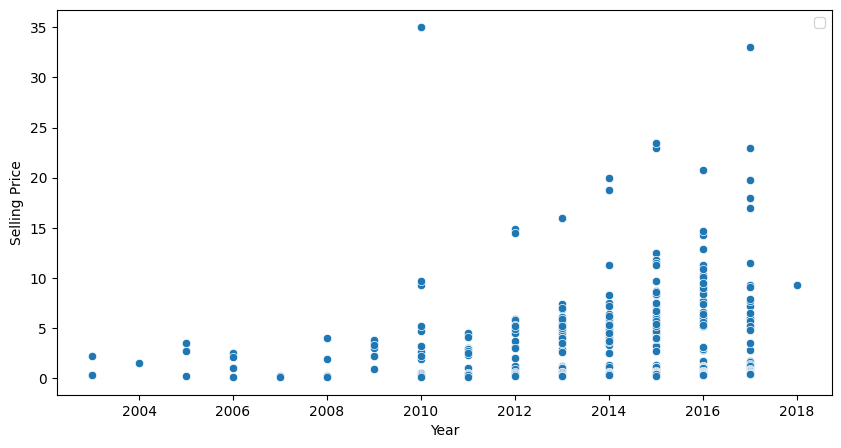

In [31]:
# show the distribution of the Year and Selling Price in the dataset
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Year', y = 'Selling_Price', data = df)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

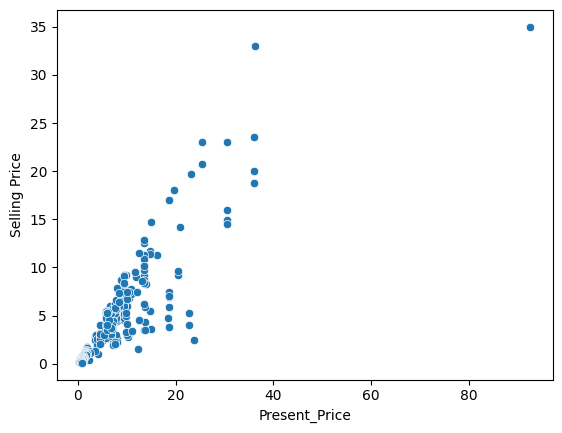

In [29]:
# show the distribution of the Present Price and Selling Price in the dataset
sns.scatterplot(x='Present_Price',y='Selling_Price',data=df)
plt.xlabel('Present_Price')
plt.ylabel('Selling Price')
plt.show()

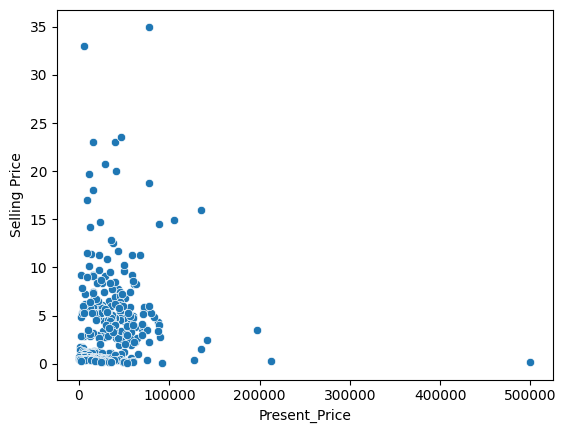

In [30]:
# show the distribution of the Driven kms and Selling Price in the dataset
sns.scatterplot(x='Driven_kms',y='Selling_Price',data=df)
plt.xlabel('Present_Price')
plt.ylabel('Selling Price')
plt.show()

In [33]:
# remove the outliers in the dataset
def remove_outliers(col):
    d25=df[col].quantile(0.25)
    d75=df[col].quantile(0.75)
    diqr=d75-d25
    upper_lim=d75+1.5*diqr
    lower_lim=d25-1.5*diqr
    filter_data=df[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ]
    return filter_data

df=remove_outliers('Selling_Price')
df=remove_outliers('Present_Price')
df=remove_outliers('Driven_kms')


In [35]:
# labelencoding the fuel_type
fuel_encoder= LabelEncoder()
df["Fuel_Type"] = fuel_encoder.fit_transform(np.array(df["Fuel_Type"])).reshape(-1,1)
#labelencoding the Selling_Price
Selling_type_encoder= LabelEncoder()
df["Selling_type"] = Selling_type_encoder.fit_transform(np.array(df["Selling_type"])).reshape(-1,1)
#labelencoding the Transmission
Transmission_encoder= LabelEncoder()
df["Transmission"] = Transmission_encoder.fit_transform(np.array(df["Transmission"])).reshape(-1,1)
#labelencoding the Car_Name
car_name_encorder= LabelEncoder()
df['Car_Name']= car_name_encorder.fit_transform(np.array(df['Car_Name'])).reshape(-1,1)

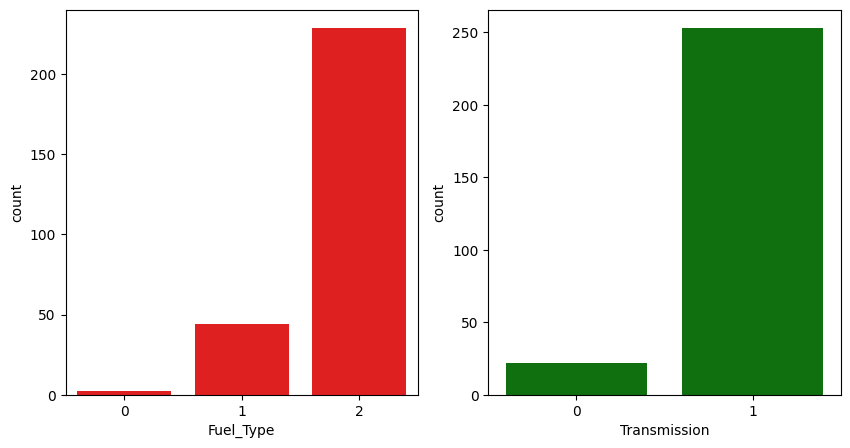

In [36]:
# show the distribution of the Fuel Type and Transmission in the dataset
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Fuel_Type', data = df, color='red')
plt.subplot(1,2,2)
sns.countplot(x = 'Transmission', data = df, color='green')
plt.show()

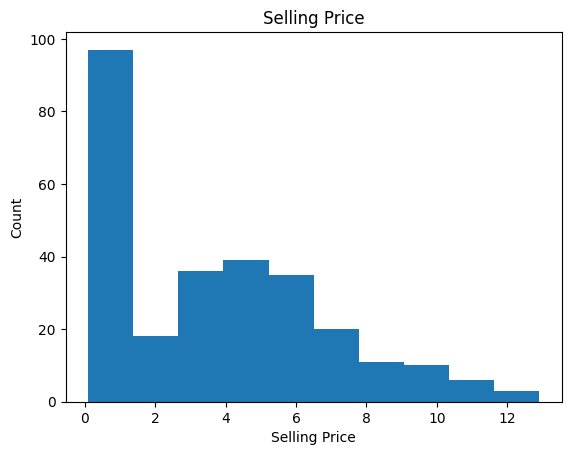

In [37]:
# show the distribution of the Selling Price
plt.hist(df["Selling_Price"])
plt.title("Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,86,2014,3.35,5.59,27000,2,0,1,0
1,89,2013,4.75,9.54,43000,1,0,1,0
2,66,2017,7.25,9.85,6900,2,0,1,0
3,92,2011,2.85,4.15,5200,2,0,1,0
4,88,2014,4.60,6.87,42450,1,0,1,0


In [41]:
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,1.000000,-0.031489,0.623245,0.635765,0.319143,-0.332002,-0.833384,0.025875,-0.123648
Year,-0.031489,1.000000,0.266493,-0.049590,-0.580550,-0.028610,0.000215,-0.063458,-0.126334
Selling_Price,0.623245,0.266493,1.000000,0.861100,0.158595,-0.418577,-0.751758,-0.056761,-0.112450
Present_Price,0.635765,-0.049590,0.861100,1.000000,0.416163,-0.357124,-0.772171,-0.021469,-0.108632
Driven_kms,0.319143,-0.580550,0.158595,0.416163,1.000000,-0.296402,-0.366702,0.116570,-0.007943
Fuel_Type,-0.332002,-0.028610,-0.418577,-0.357124,-0.296402,1.000000,0.333894,-0.129233,0.036359
Selling_type,-0.833384,0.000215,-0.751758,-0.772171,-0.366702,0.333894,1.000000,0.002224,0.093782
Transmission,0.025875,-0.063458,-0.056761,-0.021469,0.116570,-0.129233,0.002224,1.000000,0.057283
Owner,-0.123648,-0.126334,-0.112450,-0.108632,-0.007943,0.036359,0.093782,0.057283,1.000000


<Axes: >

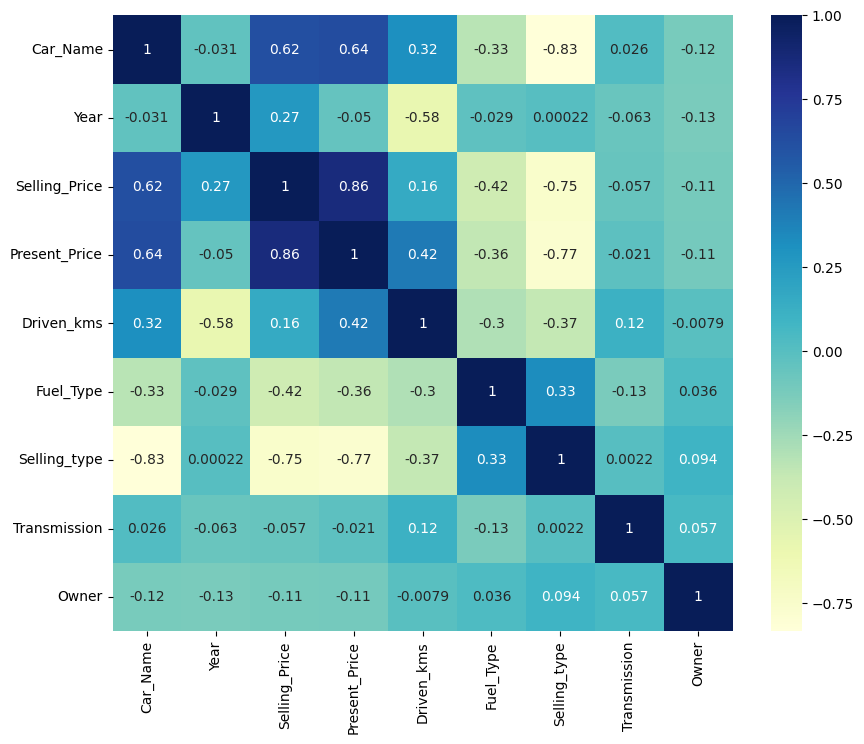

In [43]:
# show the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="YlGnBu" ,annot=True, )

In [44]:
# split the dataset into features and target
x = df.drop(columns=['Selling_Price'],axis=1)
y = df['Selling_Price']

In [45]:
# shape of the split dataset
print(x.shape)
print(y.shape)

(275, 8)
(275,)


In [46]:
# splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [47]:
print('print the shape of x_train',x_train.shape)
print('print the shape of y_train',y_train.shape)

print the shape of x_train (192, 8)
print the shape of y_train (192,)


In [48]:
# Extract the best-performing model along with any necessary preprocessing components
# Also scaling the numeric variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
# # Creating an instance of the ML models 
lr = LinearRegression()
dr = DecisionTreeRegressor()
rf = RandomForestRegressor()
svr = SVR()

In [54]:
# training the model on train dataset
lr.fit(x_train, y_train)
dr.fit(x_train, y_train)
rf.fit(x_train, y_train)
svr.fit(x_train, y_train)

SVR()

In [55]:
lr_pred = lr.predict(x_test)
dr_pred = dr.predict(x_test)
rf_pred = rf.predict(x_test)
svr_pred = svr.predict(x_test)

In [56]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR()]
models_names=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','SVR']
accuracy=[]
for model in range(len(models)):
    model=models[model]
    model.fit(x_train,y_train)
    y_pre=model.predict(x_test)
    accuracy.append((model.score(x_test,y_test))*100)
Models = pd.DataFrame({'Model':models_names,'Accuracy':accuracy})    

In [57]:
Models

,Model,Accuracy
0,LinearRegression,88.228878
1,DecisionTreeRegressor,94.892164
2,RandomForestRegressor,96.302609
3,SVR,87.621091


In [79]:
# Linear Regression Accuracy, Mean Absolute Error, Mean Squared Error
print("Linear Regression r2_score: ",r2_score(y_test,lr_pred)*100)
print("Linear Regression MAE: ",mean_absolute_error(y_test,lr_pred))
print("Linear Regression MSE: ",mean_squared_error(y_test,lr_pred))

Linear Regression r2_score:  88.22887786641064
Linear Regression MAE:  0.8317417324649522
Linear Regression MSE:  1.246993673000542


In [76]:
# Decision Tree Regression Accuracy, Mean Absolute Error, Mean Squared Error
print("Decision Tree Regression r2_score: ",r2_score(y_test,dr_pred)*100)
print("Decision Tree Regression MAE: ",mean_absolute_error(y_test,dr_pred))
print("Decision Tree Regression MSE: ",mean_squared_error(y_test,dr_pred))

Decision Tree Regression r2_score:  94.84426078700656
Decision Tree Regression MAE:  0.4798795180722891
Decision Tree Regression MSE:  0.5461819277108433


In [77]:
# Random Forest Regression Accuracy, Mean Absolute Error, Mean Squared Error
print("Random Forest Regression r2_score: ",r2_score(y_test,rf_pred)*100)
print("Random Forest Regression MAE: ",mean_absolute_error(y_test,rf_pred))
print("Random Forest Regression MSE: ",mean_squared_error(y_test,rf_pred))

Random Forest Regression r2_score:  96.30955845263459
Random Forest Regression MAE:  0.4180301204819278
Random Forest Regression MSE:  0.39095314855421714


In [78]:
# Support Vector Regression Accuracy, Mean Absolute Error, Mean Squared Error
print("Support Vector Regression r2_score: ",r2_score(y_test,svr_pred)*100)
print("Support Vector Regression MSE: ",mean_squared_error(y_test,svr_pred))
print("Support Vector Regression MAE: ",mean_absolute_error(y_test,svr_pred))


Support Vector Regression r2_score:  87.62109122667107
Support Vector Regression MSE:  1.3113805755989598
Support Vector Regression MAE:  0.6792703485168089


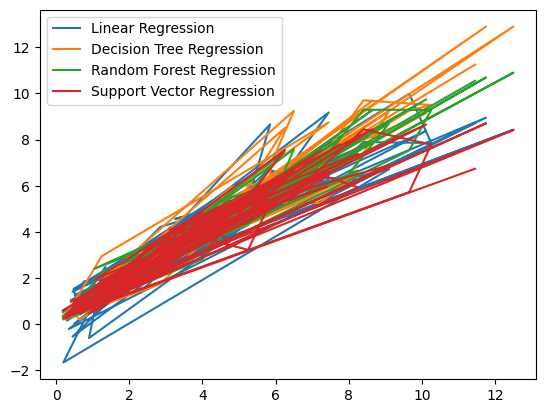

In [62]:
fig,ax= plt.subplots()
ax.plot(y_test,lr_pred)
ax.plot(y_test,dr_pred)
ax.plot(y_test,rf_pred)
ax.plot(y_test,svr_pred)
ax.legend(["Linear Regression","Decision Tree Regression","Random Forest Regression","Support Vector Regression"])

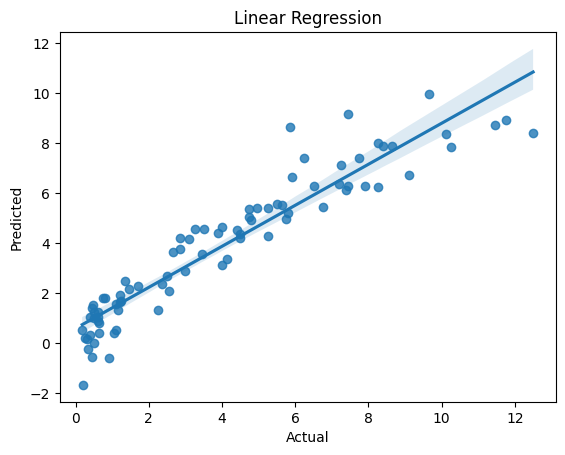

In [64]:
sns.regplot(x=y_test,y=lr_pred)
plt.title("Linear Regression")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

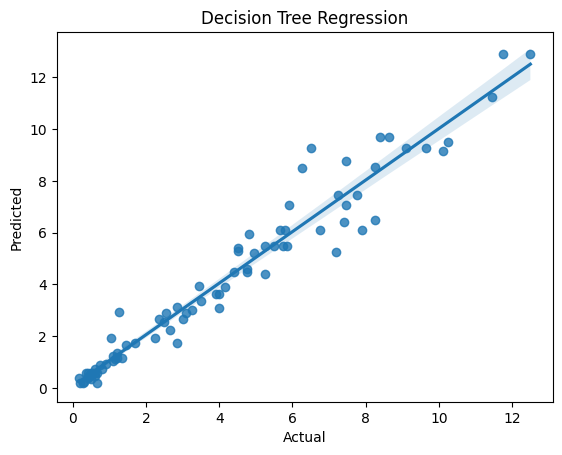

In [65]:
sns.regplot(x=y_test,y=dr_pred)
plt.title("Decision Tree Regression")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

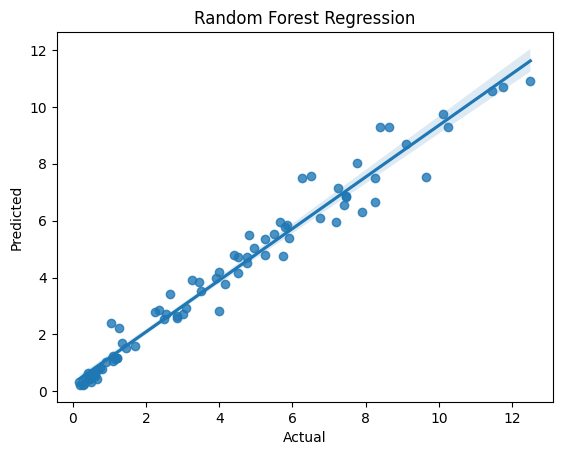

In [66]:
sns.regplot(x=y_test,y= rf_pred)
plt.title("Random Forest Regression")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

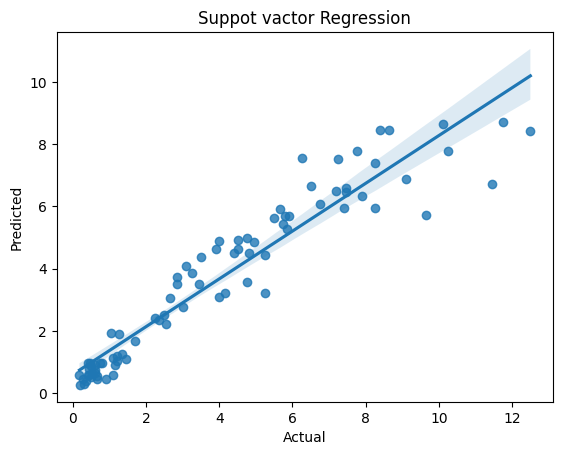

In [67]:
sns.regplot(x=y_test,y= svr_pred)
plt.title("Suppot vactor Regression")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

<Axes: xlabel='Selling_Price'>

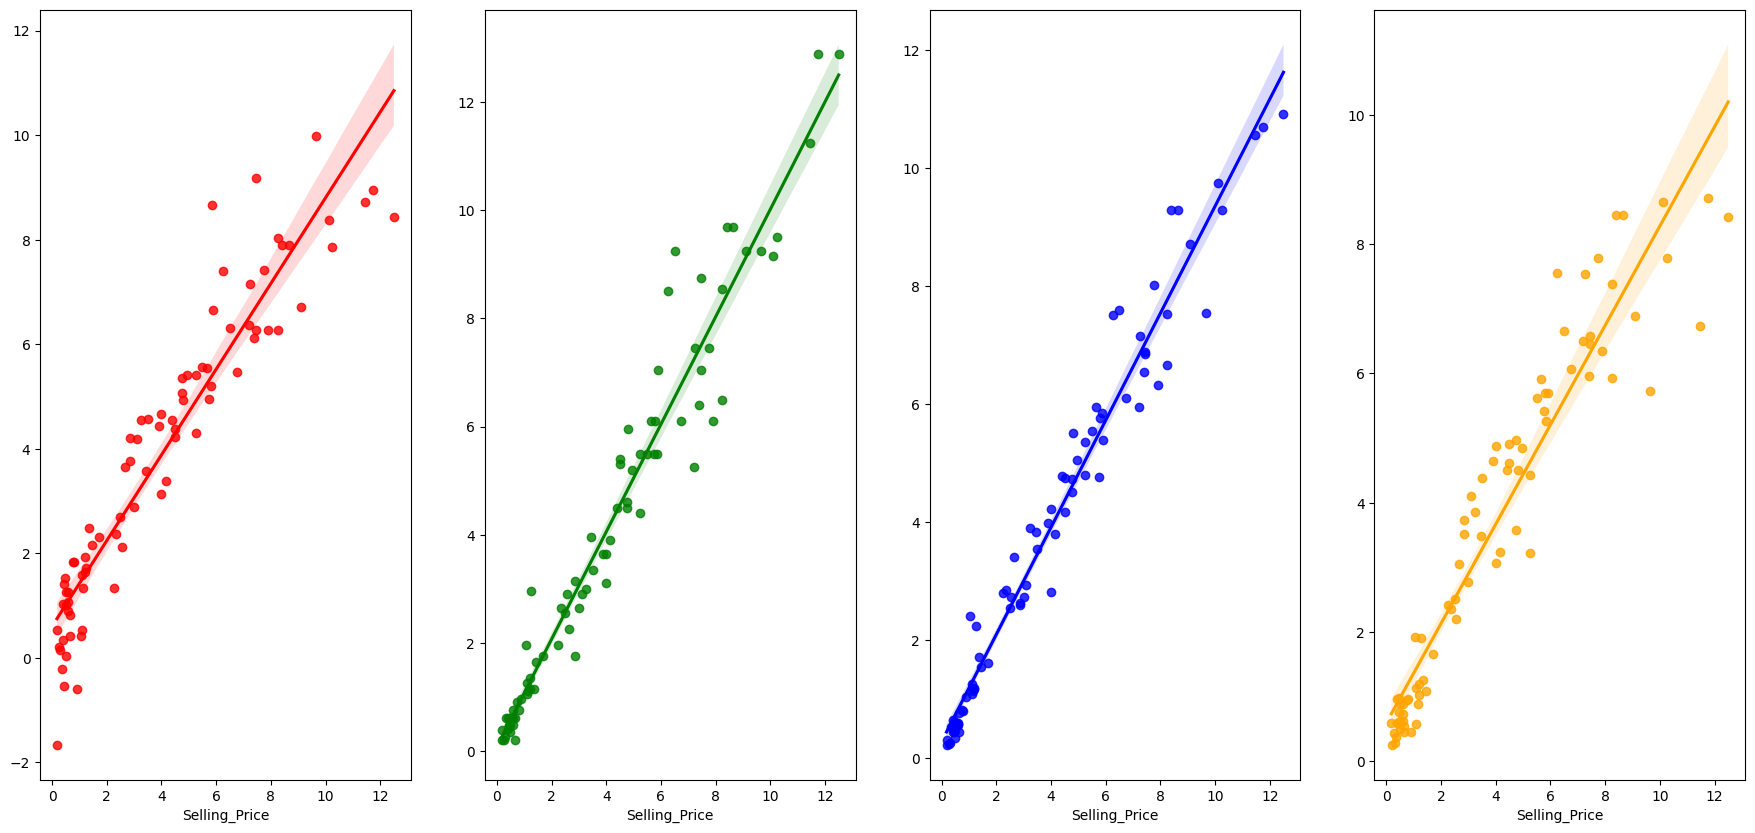

In [96]:
# Linear Regression, Decision Tree Regression, Random Forest Regression, Support Vector Regression
# how to add title 
fig,ax = plt.subplots(1,4,figsize=(22, 10))
#plt.xlabel =("Linear Regression Plots")
sns.regplot(x=y_test,y=lr_pred,ax=ax[0],color='red',label="Predicted ")
#plt.xlabel("Decision Tree Regression Plots")
sns.regplot(x=y_test,y=dr_pred,ax=ax[1], color='green',label="Predicted ")
#plt.xlabel("Random Forest Regression Plots")
sns.regplot(x=y_test,y=rf_pred,ax=ax[2], color='blue',label="Predicted ")
#plt.xlabel("Support Vector Regression Plots")
sns.regplot(x=y_test,y=svr_pred,ax=ax[3], color='orange',label="Predicted ")

#### __Comparison Result__

| ___Linear Regression:___  | ___Decision Tree Regression:___ | ___Random Forest Regression:___ | ___Support Vector Regression:___ |
| -------- | -------- | -------- | -------- |
|r2_score:  88.22887786641064 | r2_score:  94.84426078700656 | r2_score:  96.30955845263459| r2_score:  87.62109122667107 |
|MAE:  0.8317417324649522 | MAE:  0.4798795180722891 | MAE:  0.4180301204819278 |MAE:  0.6792703485168089 |
| MSE:  1.2469936730005421 | MSE:  0.5461819277108433  | MSE:  0.39095314855421714 |MSE:  1.3113805755989598  |


__Therefore, our above choice Random Forest Regressor was perfect! As less MSE and more $R^2$ Score comparatively__

## Authors
_Muhammad Ahsan_